# analise de dadosde filmes exibidos no Brasil de 2009 a 2019
base de dados: https://www.gov.br/ancine/pt-br/oca/cinema- ; a analise será feita nos filmes brasileiros

In [30]:
import pandas as pd
%matplotlib inline

In [31]:
#pular asprimeiras linhas do arquivo excel(skiprows=qtd de linhas)
#pular as ultimas linhas do arquivo excel(skipfooter=qtd de linhas)
df = pd.read_excel('filmes_estrangeiros_2009_2019.xlsx', skiprows=2, skipfooter=19)

In [32]:
df.tail(5)

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
61129,2019,semana 52,E1900431700000,Um Amante Francês,Ficção,França,Estrangeira,2019-11-28 00:00:00,Pagu Pictures,Distribuição Nacional,1,44,434.0
61130,2019,semana 52,E1900466900000,Um Dia De Chuva Em Nova York,Ficção,Estados Unidos,Estrangeira,2019-11-21 00:00:00,Imagem,Distribuição Nacional,12,2662,57290.0
61131,2019,semana 52,B1800552500000,Um Dia Para Susana,Documentário,Brasil,Brasileira,2019-10-03 00:00:00,Vitrine Filmes,Distribuição Nacional,1,12,36.0
61132,2019,semana 52,B1900177100000,Uma,Documentário,"Brasil, Índia",Brasileira,2019-11-21 00:00:00,Espaço Filmes,Distribuição Nacional,2,73,1345.0
61133,2019,semana 52,E1900436800000,Uma Segunda Chance Para Amar,Ficção,"Estados Unidos, Reino Unido",Estrangeira,2019-11-28 00:00:00,Universal,Distribuição Internacional,32,2572,41975.0


In [33]:
#verificar os tipos da coluna
df.dtypes

Ano de exibição                          int64
Semana de exibição                      object
CPB/ROE                                 object
Título da obra                          object
Gênero                                  object
País(es) produtor(es) da obra           object
Nacionalidade da obra                   object
Data de Lançamento                      object
Distribuidora                           object
Origem da empresa distribuidora         object
Número de salas na semana dos dados      int64
Público na semana dos dados              int64
Renda (R$) na semana dos dados         float64
dtype: object

In [34]:
#conveter o tipo de dado de um campo -pd.to_datetime(dataframe[coluna])
#alterar o tipo object para data do campo 'data de lançamento'
df['Data de Lançamento'] = pd.to_datetime(df['Data de Lançamento'])

ParserError: Unknown string format: Relançamento

In [35]:
#tentar identificar o problema da coluna data de lançamento
df['Data de Lançamento'].value_counts()

Relançamento           650
2014-10-23 00:00:00    250
2012-12-21 00:00:00    233
2009-06-05 00:00:00    198
2015-08-20 00:00:00    197
                      ... 
2014-10-01 00:00:00      1
2007-08-03 00:00:00      1
2006-10-13 00:00:00      1
2014-03-28 00:00:00      1
2020-01-02 00:00:00      1
Name: Data de Lançamento, Length: 879, dtype: int64

## deisão sobre dados incorreto/faltantes/divergentes

- opões: (i)alterar a data de lançamento desses filmes para a data original, (iii)ignora-los ou (iii) descarta-los

- decisão tomada: criar um dataframe sem as linhas que possuem relançamento

- vou remover usando o metodo desenvolvido por mim, por conter duas formas diferentes da mesma palavra 


### solução do curso:

In [65]:
"""
#new_dataframe = dataframe[dataframe['coluna a ser copiada para o new_dataframe'] != 'Valor desejado na linha'].copy()
novo_df = df[df['Data de Lançamento'] != 'relançamento'].copy()
novo_df = df[df['Data de Lançamento'] != 'Relançamento'].copy()

#converter o coluna data de lançamento para data
novo_df['Data de Lançamento'] = pd.to_datetime(novo_df['Data de Lançamento'])
"""

ParserError: Unknown string format: relançamento

### minha solução

In [88]:

#minha solução:
df['Data de Lançamento'] = df['Data de Lançamento'].replace('Relançamento', '') # deixar como string vazia os valores que possuem 'Relamçamento'
df['Data de Lançamento'] = df['Data de Lançamento'].replace('relançamento', '')
df['Data de Lançamento'] = pd.to_datetime(df['Data de Lançamento'])


In [89]:
df.dtypes

Ano de exibição                                 int64
Semana de exibição                             object
CPB/ROE                                        object
Título da obra                                 object
Gênero                                         object
País(es) produtor(es) da obra                  object
Nacionalidade da obra                          object
Data de Lançamento                     datetime64[ns]
Distribuidora                                  object
Origem da empresa distribuidora                object
Número de salas na semana dos dados             int64
Público na semana dos dados                     int64
Renda (R$) na semana dos dados                float64
dtype: object

### respondendo algumas perguntas

<AxesSubplot:>

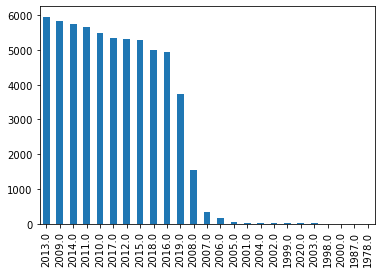

In [90]:
#Quais anos tiveram mais filmes lançados?
#dt.year.value_counts() -> pega a data e ano especifico
df['Data de Lançamento'].dt.year.value_counts().plot.bar()

In [94]:
#filme com maior bilheteria
df[df['Renda (R$) na semana dos dados'] == df['Renda (R$) na semana dos dados'].max()]

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
58087,2019,semana 17,E1900107800000,Vingadores: Ultimato,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,3139,9098740,161351954.0


In [95]:
 #3 maiores filmes com bilheteria
df.nlargest(3, 'Renda (R$) na semana dos dados')

,Ano de exibição,Semana de exibição,CPB/ROE,Título da obra,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de Lançamento,Distribuidora,Origem da empresa distribuidora,Número de salas na semana dos dados,Público na semana dos dados,Renda (R$) na semana dos dados
58087,2019,semana 17,E1900107800000,Vingadores: Ultimato,Ficção,Estados Unidos,Estrangeira,2019-04-25,Disney,Distribuição Internacional,3139,9098740,161351954.0
52787,2018,semana 18,E1800067100000,VINGADORES: GUERRA INFINITA,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,2354,6603711,111363840.0
59027,2019,semana 29,E1900267700000,O Rei Leão,Ficção,Estados Unidos,Estrangeira,2019-07-18,Disney,Distribuição Internacional,2305,6502140,109037513.0


In [103]:
#quantos filmes brsileiros e estrangeiros possuem
df['Nacionalidade da obra'].value_counts()

Estrangeira    45183
Brasileira     15951
Name: Nacionalidade da obra, dtype: int64